In [1]:
import numpy as np
import matplotlib.pyplot as plt

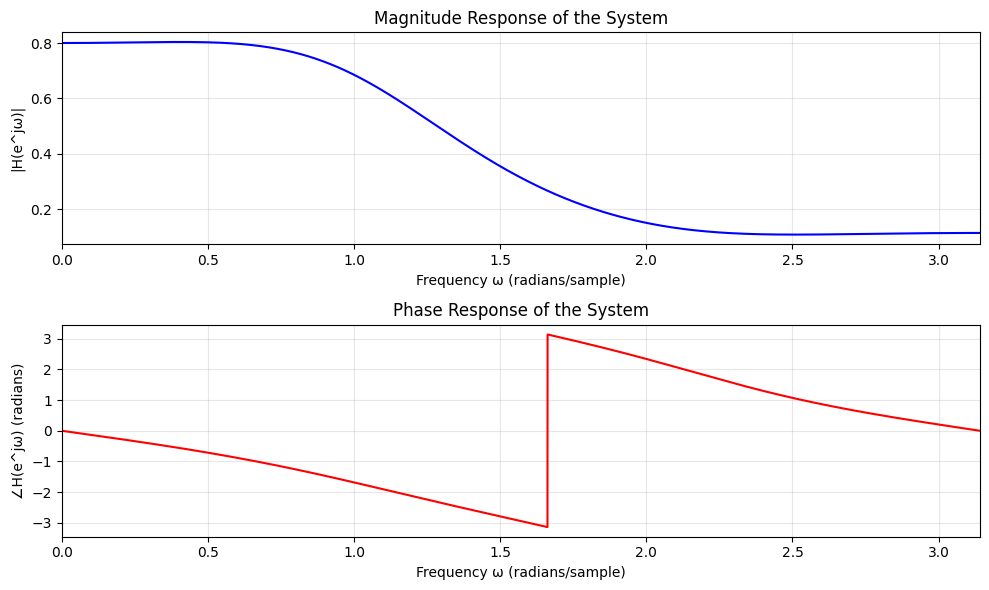

System Transfer Function H(z):
  Numerator coefficients (b): [0.1, 0.2, 0.3]
  Denominator coefficients (a): [1, -0.5, 0.25]

H(z) = (0.1 + 0.2z⁻¹ + 0.3z⁻²) / (1 - 0.5z⁻¹ + 0.25z⁻²)

Frequency Response Statistics:
  Max Magnitude: 0.8038 at ω = 0.4037 rad/sample
  Min Magnitude: 0.1084 at ω = 2.5093 rad/sample


In [2]:
# ===== SYSTEM TRANSFER FUNCTION COEFFICIENTS =====
# For a discrete-time LTI system, the transfer function H(z) is:
#
#         b[0] + b[1]*z^(-1) + b[2]*z^(-2) + ...
# H(z) = -----------------------------------------
#         a[0] + a[1]*z^(-1) + a[2]*z^(-2) + ...
#
# This represents a difference equation: y[n] = sum(b[k]*x[n-k]) - sum(a[k]*y[n-k])

b = [0.1, 0.2, 0.3]   # Numerator coefficients (feedforward/FIR part)
a = [1, -0.5, 0.25]   # Denominator coefficients (feedback/IIR part)

# ===== FREQUENCY RESPONSE CALCULATION =====
# The frequency response H(e^jω) is obtained by evaluating H(z) on the unit circle
# where z = e^(jω), and ω ranges from 0 to π (normalized frequency)

n = 8000  # Number of frequency points for smooth plot
w = np.linspace(0, np.pi, n)  # Frequency vector from 0 to π rad/sample
H = np.zeros(n, dtype=complex)  # Initialize complex frequency response array

# Evaluate H(e^jω) at each frequency point
for i in range(n):
    z = np.exp(1j * w[i])  # z = e^(jω) - point on unit circle
    
    # Calculate numerator: B(z) = b[0] + b[1]*z^(-1) + b[2]*z^(-2) + ...
    numerator = 0 + 0j
    for k in range(len(b)):
        numerator += b[k] * (z ** -k)
    
    # Calculate denominator: A(z) = a[0] + a[1]*z^(-1) + a[2]*z^(-2) + ...
    denominator = 0 + 0j
    for k in range(len(a)):
        denominator += a[k] * (z ** -k)
    
    # Transfer function: H(z) = B(z) / A(z)
    H[i] = numerator / denominator

# ===== MAGNITUDE AND PHASE EXTRACTION =====
# H(e^jω) is complex, so we extract magnitude and phase components
magnitude = np.abs(H)      # |H(e^jω)| - Magnitude response
phase = np.angle(H)        # ∠H(e^jω) - Phase response (in radians)

# ===== PLOTTING =====
plt.figure(figsize=(10, 6))

# Plot 1: Magnitude Response
plt.subplot(2, 1, 1)
plt.plot(w, magnitude, 'b', linewidth=1.5)
plt.xlabel('Frequency ω (radians/sample)')
plt.ylabel('|H(e^jω)|')
plt.title('Magnitude Response of the System')
plt.grid(True, alpha=0.3)
plt.xlim([0, np.pi])

# Plot 2: Phase Response
plt.subplot(2, 1, 2)
plt.plot(w, phase, 'r', linewidth=1.5)
plt.xlabel('Frequency ω (radians/sample)')
plt.ylabel('∠H(e^jω) (radians)')
plt.title('Phase Response of the System')
plt.grid(True, alpha=0.3)
plt.xlim([0, np.pi])

plt.tight_layout()
plt.show()

# ===== DISPLAY SYSTEM INFORMATION =====
print("System Transfer Function H(z):")
print(f"  Numerator coefficients (b): {b}")
print(f"  Denominator coefficients (a): {a}")
print(f"\nH(z) = (0.1 + 0.2z⁻¹ + 0.3z⁻²) / (1 - 0.5z⁻¹ + 0.25z⁻²)")
print(f"\nFrequency Response Statistics:")
print(f"  Max Magnitude: {np.max(magnitude):.4f} at ω = {w[np.argmax(magnitude)]:.4f} rad/sample")
print(f"  Min Magnitude: {np.min(magnitude):.4f} at ω = {w[np.argmin(magnitude)]:.4f} rad/sample")